Circuit with Star Topology:
         ┌───┐              ░    ┌─┐   
q_0 -> 0 ┤ H ├──■───X───■───░────┤M├───
         └───┘┌─┴─┐ │   │   ░ ┌─┐└╥┘   
q_1 -> 1 ─────┤ X ├─X───┼───░─┤M├─╫────
              └───┘   ┌─┴─┐ ░ └╥┘ ║ ┌─┐
q_2 -> 2 ─────────────┤ X ├─░──╫──╫─┤M├
                      └───┘ ░  ║  ║ └╥┘
 meas: 3/══════════════════════╩══╩══╩═
                               0  1  2 

Circuit with Linear Chain Topology:
         ┌───┐           ░ ┌─┐      
q_0 -> 0 ┤ H ├──■────────░─┤M├──────
         └───┘┌─┴─┐      ░ └╥┘┌─┐   
q_1 -> 1 ─────┤ X ├──■───░──╫─┤M├───
              └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2 -> 2 ──────────┤ X ├─░──╫──╫─┤M├
                   └───┘ ░  ║  ║ └╥┘
 meas: 3/═══════════════════╩══╩══╩═
                            0  1  2 

Results with Star Topology: {'111': 537, '000': 487}
Results with Linear Chain Topology: {'111': 493, '000': 531}


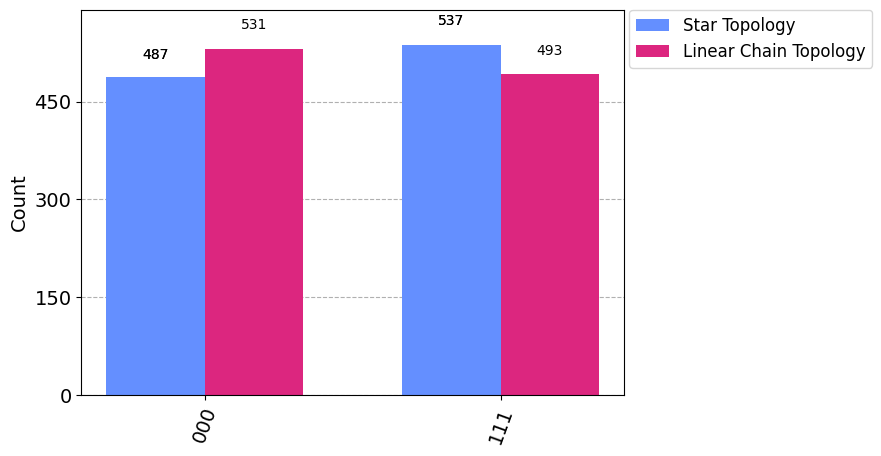

In [3]:
from qiskit import QuantumCircuit, transpile, Aer, execute, QuantumRegister
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.transpiler import Layout, CouplingMap

# Create a Quantum Register and Quantum Circuit
qr = QuantumRegister(3, 'q')
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[2])
qc.measure_all()

# Simulate a 'star' topology where qubit 0 is connected to qubits 1 and 2
star_coupling_map = CouplingMap([[0, 1], [0, 2]])
star_layout = Layout({qr[0]: 0, qr[1]: 1, qr[2]: 2})

# Simulate a 'linear chain' topology where qubit 0 is connected to 1, and 1 is connected to 2
linear_coupling_map = CouplingMap([[0, 1], [1, 2]])
linear_layout = Layout({qr[0]: 0, qr[1]: 1, qr[2]: 2})

# Transpile the circuit for both topologies
qc_star = transpile(qc, backend=AerSimulator(), coupling_map=star_coupling_map, initial_layout=star_layout)
qc_linear = transpile(qc, backend=AerSimulator(), coupling_map=linear_coupling_map, initial_layout=linear_layout)

# Visualize the transpiled circuits
print("Circuit with Star Topology:")
print(qc_star)
print("\nCircuit with Linear Chain Topology:")
print(qc_linear)

# Run the circuits on a simulator and compare results
simulator = Aer.get_backend('aer_simulator')
result_star = execute(qc_star, simulator).result()
result_linear = execute(qc_linear, simulator).result()

# Display results
counts_star = result_star.get_counts()
counts_linear = result_linear.get_counts()

print("\nResults with Star Topology:", counts_star)
print("Results with Linear Chain Topology:", counts_linear)

# Visualize circuit layout and results
# plot_circuit_layout(qc_star, backend=AerSimulator())
# plot_circuit_layout(qc_linear, backend=AerSimulator())
plot_histogram([counts_star, counts_linear], legend=['Star Topology', 'Linear Chain Topology'])